In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set some display options for pandas for better readability
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', 100)    # Show up to 100 rows
pd.set_option('display.width', 1000)      # Adjust display width

# Configure matplotlib for inline plotting in Jupyter
%matplotlib inline
sns.set_style('whitegrid') # Using seaborn's whitegrid style for plots

# Define the path to your dataset
# Make sure 'sample_crimes_data.csv' is in the same directory as your notebook,
# or provide the full path.
file_path = 'Crime_Data_from_2020_to_Present.csv'

# Load the dataset
try:
    df_crimes = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found. Please check the path.")
    # Exit or handle the error appropriately if the file isn't found
    # For now, we'll just print and let it proceed, but in a real script you'd stop.
    df_crimes = pd.DataFrame() # Create an empty DataFrame to avoid further errors if file not found

# Display the first few rows of the dataframe

print("\nFirst 5 rows of the dataset:")
display(df_crimes.head())

Dataset loaded successfully!

First 5 rows of the dataset:


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [14]:
print(f"Number of rows: {df_crimes.shape[0]}")
print(f"Number of columns: {df_crimes.shape[1]}")
print("\nNull values in each column:")
print(df_crimes.isnull().sum())
print("\nSummary statistics of the dataset:")
print(df_crimes.describe(include='all'))  # Include all columns for summary statistics
df_crimes.info()

Number of rows: 1005091
Number of columns: 28

Null values in each column:
DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151705
Vict Age                0
Vict Sex           144729
Vict Descent       144741
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677841
Weapon Desc        677841
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935934
Crm Cd 3          1002777
Crm Cd 4          1005027
LOCATION                0
Cross Street       850854
LAT                     0
LON                     0
dtype: int64

Summary statistics of the dataset:
               DR_NO               Date Rptd                DATE OCC      TIME OCC          AREA AREA NAME   Rpt Dist No      Part 1-2        Crm Cd


Missing values per column:


,Column Name,Number of Nulls,Percentage of Nulls
10,Mocodes,151705,15.09
12,Vict Sex,144729,14.40
13,Vict Descent,144741,14.40
14,Premis Cd,16,0.00
15,Premis Desc,588,0.06
16,Weapon Used Cd,677841,67.44
17,Weapon Desc,677841,67.44
18,Status,1,0.00
20,Crm Cd 1,11,0.00
21,Crm Cd 2,935934,93.12


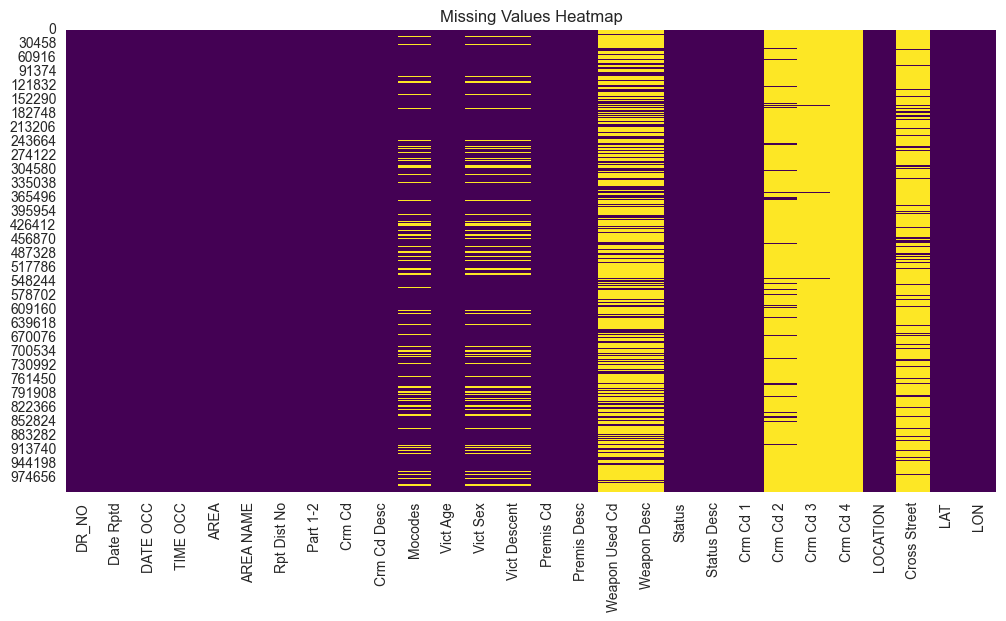

In [21]:

print("\nMissing values per column:")
missing_values = df_crimes.isnull().sum()
missing_percentage = np.round((missing_values / df_crimes.shape[0]) * 100, 2)

# Create a DataFrame with column names, number of nulls, and percentage of nulls
null_summary_df = pd.DataFrame({
    'Column Name': missing_values.index,
    'Number of Nulls': missing_values.values,
    'Percentage of Nulls': missing_percentage.values
})


# Filter to display only columns with missing values
missing_values_df = null_summary_df[null_summary_df['Number of Nulls'] > 0]

# Display the filtered DataFrame
display(missing_values_df)


plt.figure(figsize=(12, 6))
sns.heatmap(df_crimes.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

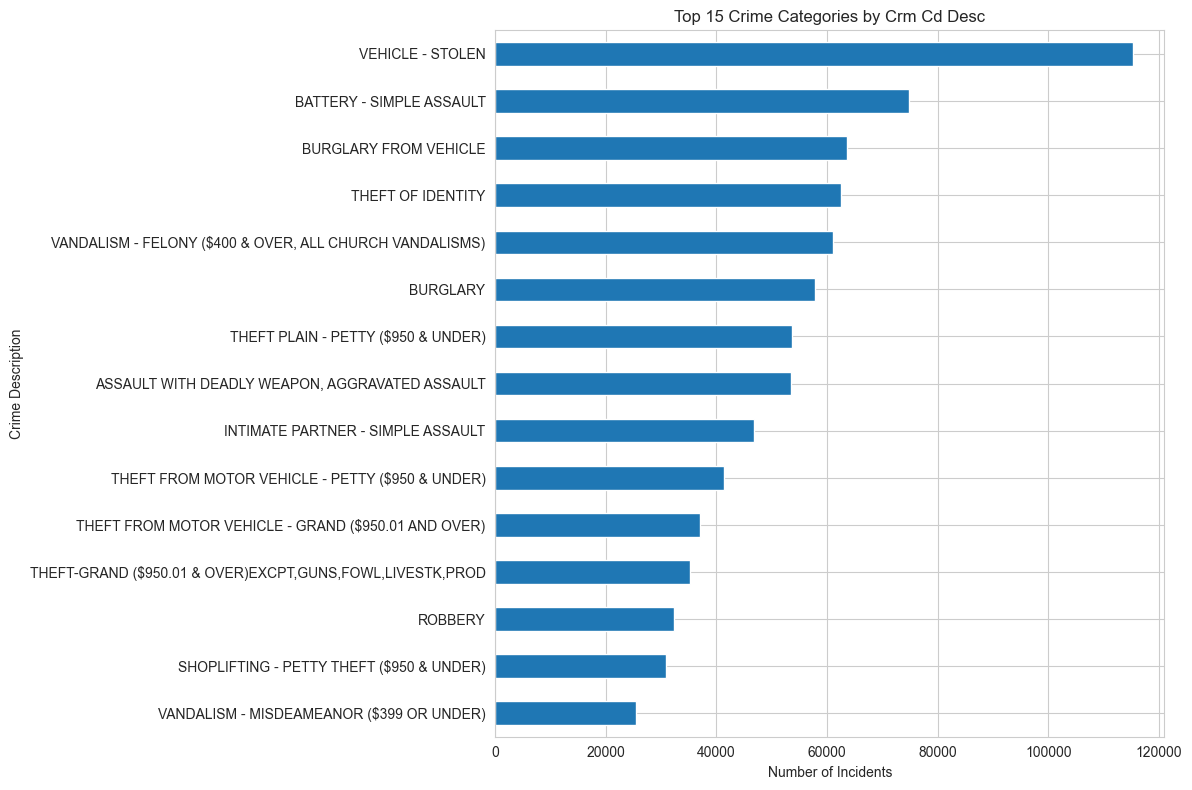

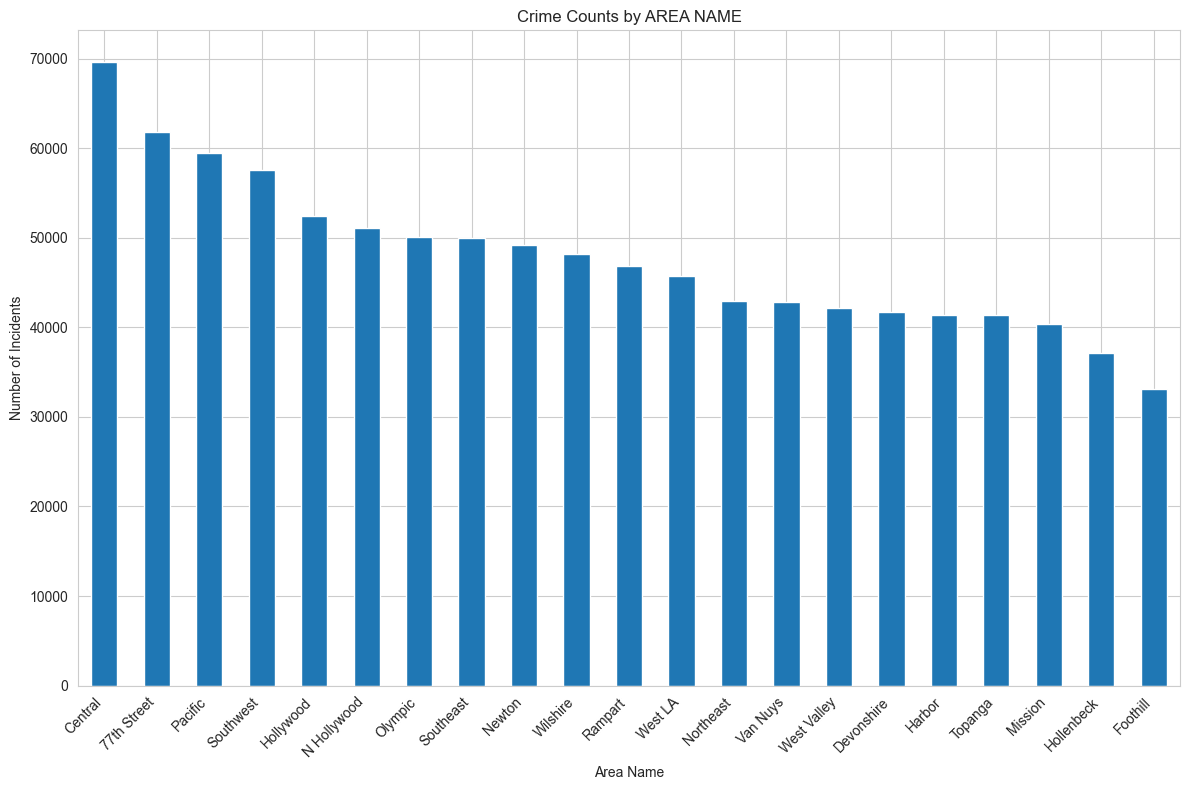

In [24]:

crime_column = 'Crm Cd Desc'
if crime_column in df_crimes.columns:
    # print(f"\nTop 10 Crime Categories (based on '{crime_column}'):")
    # print(df_crimes[crime_column].value_counts().nlargest(10))

    # Plot top N crime categories
    plt.figure(figsize=(12, 8))
    df_crimes[crime_column].value_counts().nlargest(15).plot(kind='barh')
    plt.title(f'Top 15 Crime Categories by {crime_column}')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Crime Description')
    plt.gca().invert_yaxis() # To show the highest count at the top
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{crime_column}' not found in the dataset.")

# Describe Area Categories (assuming 'AREA NAME' is the relevant column)
# If your column name is different, please adjust it.
area_column = 'AREA NAME' # CHANGE THIS if your column name for area is different
if area_column in df_crimes.columns:
    # print(f"\nCrime Counts by Area (based on '{area_column}'):")
    # print(df_crimes[area_column].value_counts())

    # Plot crime counts by area
    plt.figure(figsize=(12, 8))
    df_crimes[area_column].value_counts().plot(kind='bar')
    plt.title(f'Crime Counts by {area_column}')
    plt.xlabel('Area Name')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{area_column}' not found in the dataset.")

In [ ]:
if not df_crimes.empty:
    # Convert date columns to datetime objects
    date_occ_col = 'DATE OCC' # CHANGE THIS if your column name is different
    time_occ_col = 'TIME OCC' # CHANGE THIS if your column name is different

    if date_occ_col in df_crimes.columns:
        try:
            # Attempt to convert 'DATE OCC' to datetime
            df_crimes['DATE OCC_dt'] = pd.to_datetime(df_crimes[date_occ_col])

            # Extract year, month, day, day of week
            df_crimes['Year'] = df_crimes['DATE OCC_dt'].dt.year
            df_crimes['Month'] = df_crimes['DATE OCC_dt'].dt.month
            df_crimes['Day'] = df_crimes['DATE OCC_dt'].dt.day
            df_crimes['DayOfWeek'] = df_crimes['DATE OCC_dt'].dt.day_name()
            df_crimes['Hour'] = None # Initialize Hour column

            # Combine 'DATE OCC' and 'TIME OCC' for a full timestamp if 'TIME OCC' exists
            if time_occ_col in df_crimes.columns:
                # TIME OCC is often an integer like 1830 for 6:30 PM.
                # We need to format it correctly.
                # Convert TIME OCC to string, pad with leading zeros to ensure 4 digits
                df_crimes[time_occ_col_str] = df_crimes[time_occ_col].astype(str).str.zfill(4)
                # Create a combined datetime string
                datetime_str_series = df_crimes[date_occ_col] + ' ' + \
                                      df_crimes[time_occ_col_str].str.slice(0, 2) + ':' + \
                                      df_crimes[time_occ_col_str].str.slice(2, 4) + ':00'
                
                # Convert to datetime, coercing errors for unparseable formats
                df_crimes['FullDateTimeOCC'] = pd.to_datetime(datetime_str_series, format='%m/%d/%Y %H:%M:%S', errors='coerce')
                
                # Extract hour from the full datetime
                df_crimes['Hour'] = df_crimes['FullDateTimeOCC'].dt.hour
            else:
                print(f"Column '{time_occ_col}' not found, hour analysis will be limited.")


            # --- Temporal Analysis ---

            # Crimes by Year
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df_crimes, x='Year', palette='viridis')
            plt.title('Number of Crimes per Year')
            plt.xlabel('Year')
            plt.ylabel('Number of Incidents')
            plt.show()
            print("\nCrimes per Year:")
            print(df_crimes['Year'].value_counts().sort_index())

            # Crimes by Month
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df_crimes, x='Month', order=range(1,13), palette='viridis')
            plt.title('Number of Crimes per Month (All Years)')
            plt.xlabel('Month')
            plt.ylabel('Number of Incidents')
            plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            plt.show()
            print("\nCrimes per Month (All Years):")
            print(df_crimes['Month'].value_counts().sort_index())

            # Crimes by Day of Week
            days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df_crimes, x='DayOfWeek', order=days_order, palette='viridis')
            plt.title('Number of Crimes by Day of the Week')
            plt.xlabel('Day of Week')
            plt.ylabel('Number of Incidents')
            plt.show()
            print("\nCrimes per Day of Week:")
            print(df_crimes['DayOfWeek'].value_counts().reindex(days_order))

            # Crimes by Hour (if 'TIME OCC' was processed)
            if 'Hour' in df_crimes.columns and df_crimes['Hour'].notna().any():
                plt.figure(figsize=(12, 6))
                sns.countplot(data=df_crimes, x='Hour', order=range(0,24), palette='viridis')
                plt.title('Number of Crimes by Hour of the Day')
                plt.xlabel('Hour of Day (0-23)')
                plt.ylabel('Number of Incidents')
                plt.show()
                print("\nCrimes per Hour of Day:")
                print(df_crimes['Hour'].value_counts().sort_index())
            else:
                print("\nSkipping hourly analysis as 'Hour' data is not available or could not be processed.")

        except Exception as e:
            print(f"Error during date/time processing: {e}")
            print("Please check the format of 'DATE OCC' and 'TIME OCC' columns.")
    else:
        print(f"Date column '{date_occ_col}' not found. Temporal analysis cannot be performed.")